In [8]:
import numpy as np
import pandas as pd
import time
import censusgeocode as cg
from tqdm import tqdm
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
# Load bounding box info (DC)
df_bbox = pd.read_csv('/Users/wooyongjung/WJ_Projects/HomelessStudy_SanFrancisco_2024/data/DC_bbox/df_bbox_99.csv')
df_bbox.head()

,Unnamed: 0,row_num,col_num,swne_edges,center_latlon,center_lat,center_lon,GEOID
0,0,0,0,"(38.79004401168929, -77.12214000035773, 38.791...","(38.79078547660671, -77.12123558302413)",38.790785,-77.121236,510594203001
1,1,0,1,"(38.7900776409016, -77.12028819502156, 38.7915...","(38.790819092024, -77.11938375742014)",38.790819,-77.119384,510594203001
2,2,0,2,"(38.79011124079366, -77.11843638659438, 38.791...","(38.79085267812021, -77.11753192872636)",38.790853,-77.117532,510594203001
3,3,0,3,"(38.79014481136531, -77.11658457507889, 38.791...","(38.790886234895176, -77.11568009694551)",38.790886,-77.115680,510594203001
4,4,0,4,"(38.7901783526164, -77.11473276047779, 38.7916...","(38.790919762348764, -77.11382826208028)",38.790920,-77.113828,510594203001


In [5]:
# Select the rows with GEOID starting with 06075 (San Francisco)
df_bbox['GEOID'] = df_bbox['GEOID'].astype(str)
df_bbox['GEOID'] = df_bbox['GEOID'].apply(lambda x: x.zfill(12))
df_bbox = df_bbox[df_bbox['GEOID'].str.startswith('11001')]

# Reset index
df_bbox.reset_index(drop=True, inplace=True)

# Drop the first column Unnamed: 0
df_bbox = df_bbox.drop(['Unnamed: 0'], axis=1)

# Separate 'swen_edges' into four columns
df_bbox[['south','west','north','east']] = df_bbox['swne_edges'].apply(lambda x: pd.Series(str(x).strip('()').replace(" ","").split(',')))
df_bbox[['south','west','north','east']] = df_bbox[['south','west','north','east']].astype(float)

# Create bboxid adding row_num and col_num
df_bbox['bboxid'] = 'bbox_' + df_bbox['row_num'].astype(str) + '_' + df_bbox['col_num'].astype(str)

In [6]:
df_bbox.head()

,row_num,col_num,swne_edges,center_latlon,center_lat,center_lon,GEOID,south,west,north,east,bboxid
0,1,45,"(38.79297766582736, -77.03884704247784, 38.794...","(38.79371850978283, -77.03794169706438)",38.793719,-77.037942,110010109002,38.792978,-77.038847,38.794459,-77.037036,bbox_1_45
1,2,45,"(38.79442703415638, -77.03888834960206, 38.795...","(38.79516787874482, -77.03798298694552)",38.795168,-77.037983,110010109002,38.794427,-77.038888,38.795909,-77.037078,bbox_2_45
2,2,46,"(38.79445934713823, -77.037036332922, 38.79594...","(38.795200177892994, -77.03613095004992)",38.795200,-77.036131,110010109002,38.794459,-77.037036,38.795941,-77.035226,bbox_2_46
3,3,45,"(38.79587640208779, -77.03892965969936, 38.797...","(38.79661724730925, -77.0380242797985)",38.796617,-77.038024,110010109002,38.795876,-77.038930,38.797358,-77.037119,bbox_3_45
4,3,46,"(38.79590871673287, -77.03707760555871, 38.797...","(38.79664954811994, -77.03617220544085)",38.796650,-77.036172,110010109002,38.795909,-77.037078,38.797390,-77.035267,bbox_3_46


In [10]:
from shapely.geometry import Polygon, LineString, Point, MultiPolygon
from shapely import wkt

In [11]:
# Create coordinates
coords = []
for i in range(len(df_bbox)):
    coord = [(df_bbox['swne_edges'][i][1], df_bbox['swne_edges'][i][0]),
             (df_bbox['swne_edges'][i][3], df_bbox['swne_edges'][i][0]),
             (df_bbox['swne_edges'][i][3], df_bbox['swne_edges'][i][2]),
             (df_bbox['swne_edges'][i][1], df_bbox['swne_edges'][i][2])]
    coords.append(coord)

df_bbox['coords'] = coords

In [12]:
# Apply Polygon to coords
df_bbox['geometry'] = df_bbox['coords'].apply(Polygon)

ValueError: could not convert string to float: '('

In [7]:
df_bbox['GEOID'].nunique()

566

<Axes: >

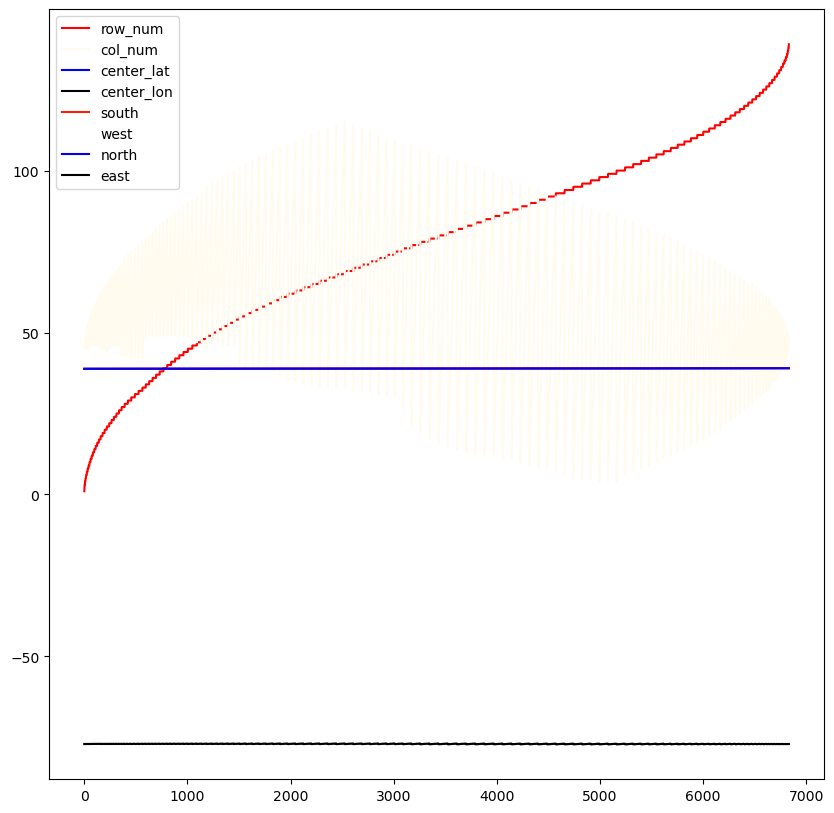

In [9]:
df_bbox.plot(column='GEOID', cmap='flag', figsize=(10,10))